In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import timedelta

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE

In [3]:
appl = pd.read_csv('data/energydata_complete.csv', index_col = 0)
train = pd.read_csv('data/training.csv')
test = pd.read_csv('data/testing.csv')
appl.head()
appl.tail()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


## Exploring the data

Appliances energy consuption measurement for the whole period:

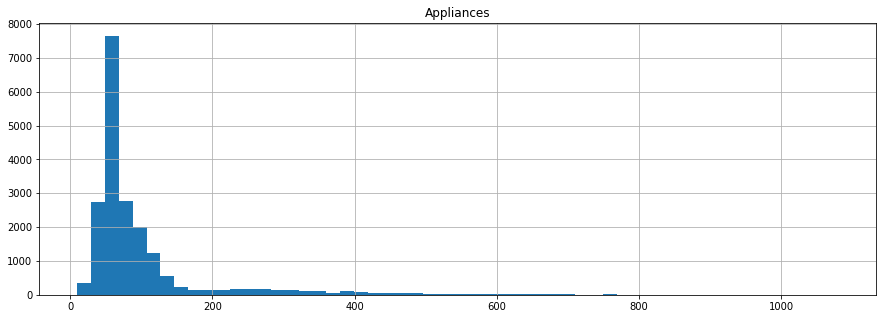

In [9]:
hist = appl.hist(column = 'Appliances', bins=55,figsize=(15,5))

Appliance boxplot on the first week of the data

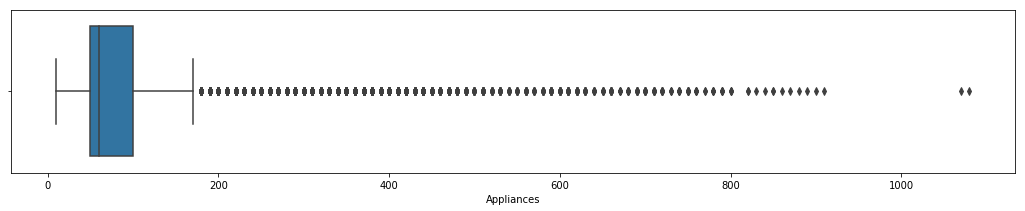

In [70]:
fig  = plt.subplots(figsize = (18,3))
ax = sns.boxplot(data = appl, x = 'Appliances', orient='h')


Pairplot of all the variables

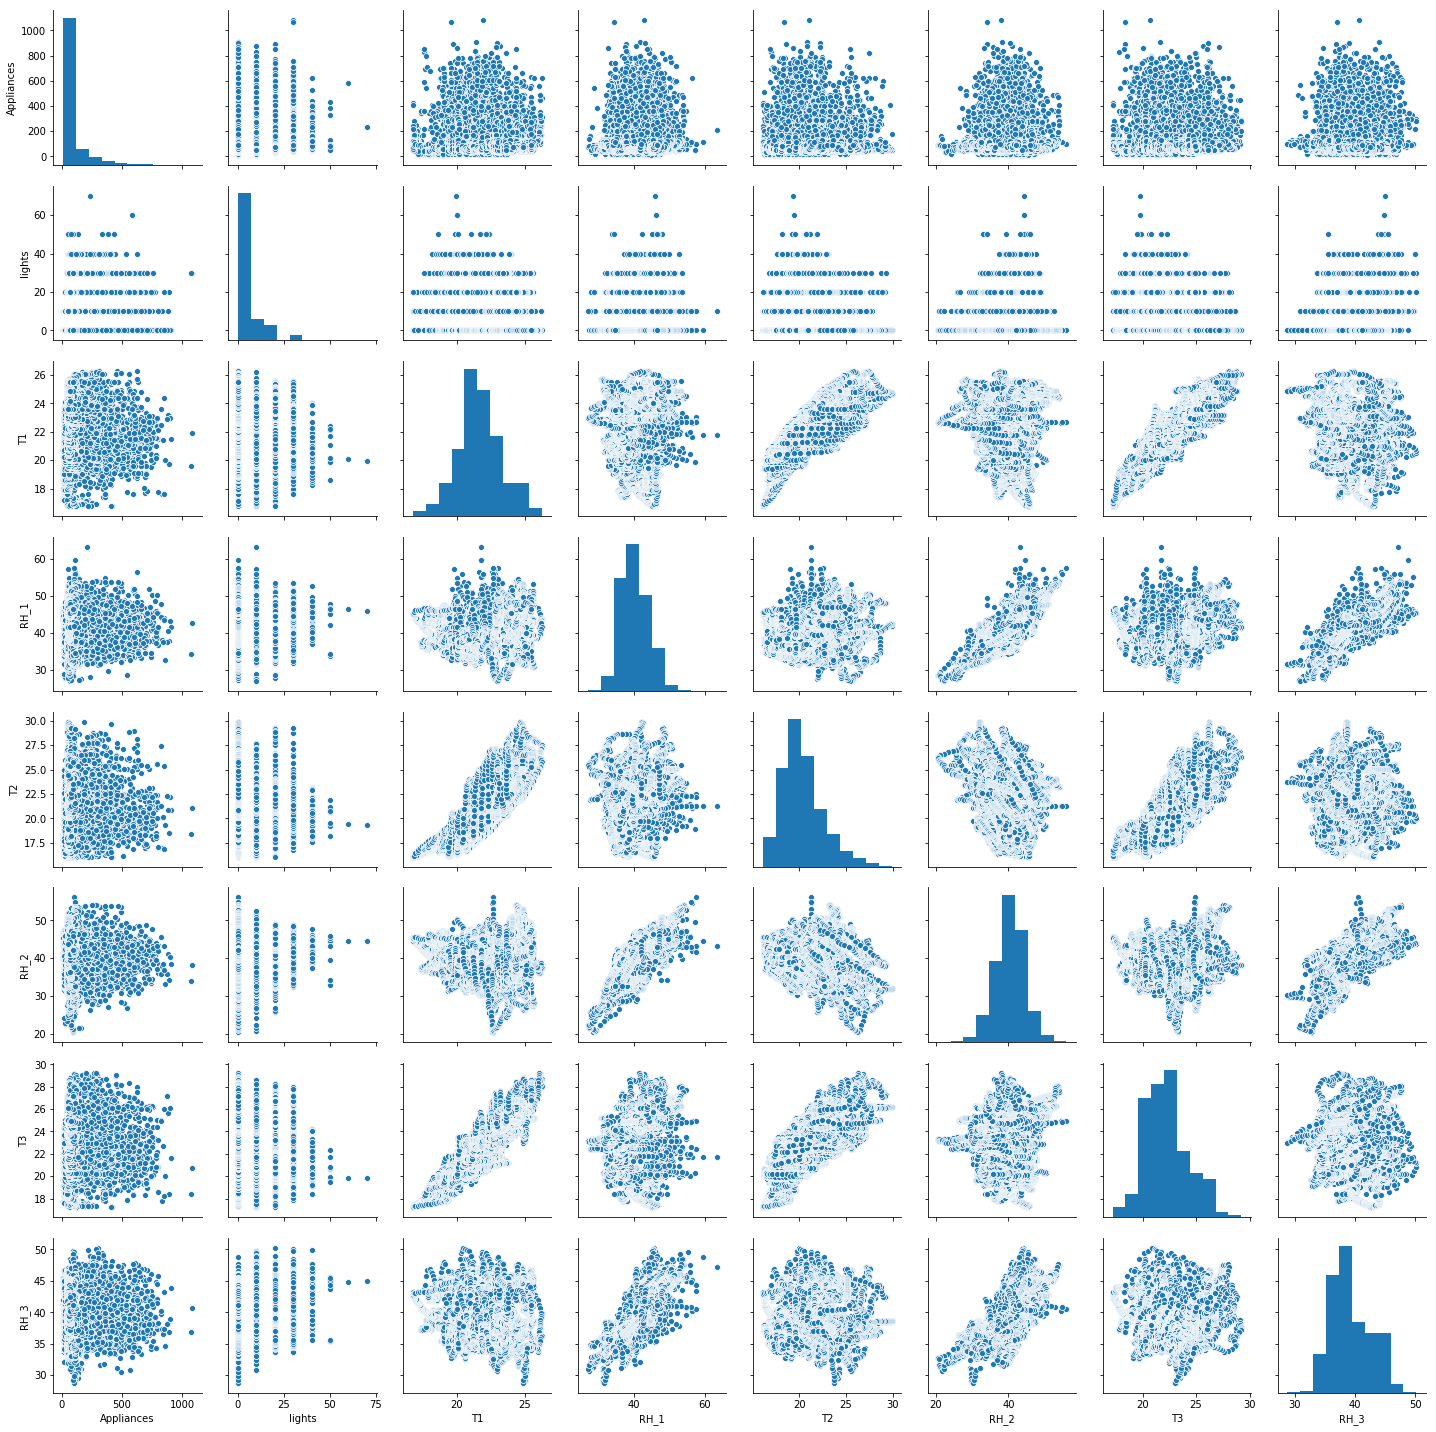

In [71]:
g = sns.pairplot(appl, vars=["Appliances","lights","T1","RH_1","T2","RH_2","T3","RH_3"],palette="husl")

## Fitting a linear model and generating evaluation metrics

Spitting the data into the train and test portions, then training the data:

In [72]:
y = appl.drop(['Appliances', 'rv2','rv1','Visibility'], axis = 1)

X = appl[['Appliances']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 41)

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
reg.predict(X_test)

array([[ 3.15725447, 21.64965141, 40.13507611, ..., 80.61685683,
         3.97064592,  3.73900148],
       [ 2.99829256, 21.64069559, 40.10324088, ..., 80.84930747,
         3.9473172 ,  3.73192157],
       [ 3.15725447, 21.64965141, 40.13507611, ..., 80.61685683,
         3.97064592,  3.73900148],
       ...,
       [ 6.65441648, 21.84667936, 40.83545117, ..., 75.50294284,
         4.48387759,  3.89475948],
       [ 2.68036874, 21.62278396, 40.03957042, ..., 81.31420874,
         3.90065978,  3.71776175],
       [ 2.83933065, 21.63173978, 40.07140565, ..., 81.0817581 ,
         3.92398849,  3.72484166]])

Finally getting the metrics: mean squared error and R<sup>2 

In [54]:
predicted = reg.predict(X_test)
mse = ((np.array(y_test)-predicted)**2).sum()/len(y_test)
r2 = r2_score(y_test, predicted)
print("MSE:", mse)
print("R Squared:", r2)

MSE: 1640.4081977928508
R Squared: 0.005256911348791744


## Apply Recursive Feature Estimation 
selecting best features and comparing results